<a href="https://colab.research.google.com/github/tejasdubhir/Psosm-project/blob/main/IR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#don't run this part
%cd gdrive/My\ Drive/data

/content/gdrive/My Drive/data


In [ ]:
import tweepy
import json
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# WorldPoetryDay = pd.read_csv('WorldPoetryDay.csv')
WorldPoetryDay = pd.read_csv('CombinedDataset.csv')

WorldPoetryDay = WorldPoetryDay.iloc[:,:]
WorldPoetryDay.head()

,Unnamed: 0,res,created_at,full_text,retweeted,user
0,0,1.0,Sun Mar 21 11:41:14 +0000 2021,RT @VijayFansUpdate: Massive 1⃣0⃣0⃣ MILLION vi...,False,"{'id': 1093218419372056576, 'id_str': '1093218..."
1,1,1.0,Sun Mar 21 11:41:14 +0000 2021,RT @KUMARESH_VJ01: Tag Speed Check at 05:10PM ...,False,"{'id': 1364130692075028483, 'id_str': '1364130..."
2,2,1.0,Sun Mar 21 11:41:13 +0000 2021,RT @Saro_Rules: Tag Trending More than 2 Hours...,False,"{'id': 1010092819850002433, 'id_str': '1010092..."
3,3,1.0,Sun Mar 21 11:41:13 +0000 2021,RT @Master_Mahiii: Once A King !! Always a Kin...,False,"{'id': 1136827124772265985, 'id_str': '1136827..."
4,4,1.0,Sun Mar 21 11:41:13 +0000 2021,RT @ItzJsurya_: Tag Comments Pls 🙂\n\n#VaathiC...,False,"{'id': 841298244424544256, 'id_str': '84129824..."


In [ ]:
WorldPoetryDayNp = WorldPoetryDay.to_numpy()
print(WorldPoetryDay.shape)
# X, y = WorldPoetryDayNp[:,[2,4,15,22,23]],WorldPoetryDayNp[:,0]
X, y = WorldPoetryDayNp[:,3],WorldPoetryDayNp[:,1]
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])
Xn = []
yn = []
for i in range(len(X)):
  # print(y[i])
  # print(int(y[i]))
  if((y[i] == 0 or y[i] == 1) and int(y[i]) >= 2):
    continue
  else:
    Xn.append(X[i])
    yn.append(y[i])
  # break
X = np.array(Xn); y = np.array(yn)
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

# print(y.unique())

(6022, 6)
(6022,)
(6022,)
['RT @VijayFansUpdate: Massive 1⃣0⃣0⃣ MILLION views in 54 Days 🔥  This is Just the Beginning! #Master \n\nHere is the Daily Views Chart of #Vaa…'
 'RT @KUMARESH_VJ01: Tag Speed Check at 05:10PM \n\nTag 👉 #VaathiComing100MViews\n\n#Master || @actorvijay\n#TeamThalapathyBloods\n\n#Flutter #100Da…'
 'RT @Saro_Rules: Tag Trending More than 2 Hours Top of India Trends 😎💥\n\n#VaathiComing100MViews \n#Master'
 'RT @Master_Mahiii: Once A King !! Always a King - Thalapathy 😎\n\n#VaathiComing100MViews\n#Master #Thalapathy65 @actorvijay https://t.co/u6veI…'
 'RT @ItzJsurya_: Tag Comments Pls 🙂\n\n#VaathiComing100MViews\n#Master @actorvijay']
[1.0 1.0 1.0 1.0 1.0]
(6022,)
(6022,)
['RT @VijayFansUpdate: Massive 1⃣0⃣0⃣ MILLION views in 54 Days 🔥  This is Just the Beginning! #Master \n\nHere is the Daily Views Chart of #Vaa…'
 'RT @KUMARESH_VJ01: Tag Speed Check at 05:10PM \n\nTag 👉 #VaathiComing100MViews\n\n#Master || @actorvijay\n#TeamThalapathyBloods\n\n#Flutter #100Da…'


1.0    5498
0.0     417
Name: 0, dtype: int64


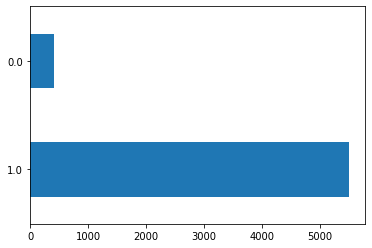

In [ ]:
#plotting class frequency
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [ ]:
#down samplling
length = len(X)
Xn = []; yn = []
for i in range(length):
  if(y[i] == 0):
    yn.append(y[i])
    Xn.append(X[i])
for i in range(4*len(Xn)+20):
  if(y[i] == 1):
    yn.append(y[i])
    Xn.append(X[i])
X = np.array(Xn); y = np.array(yn)
print(y)


[0. 0. 0. ... 1. 1. 1.]


1.0    1450
0.0     417
Name: 0, dtype: int64


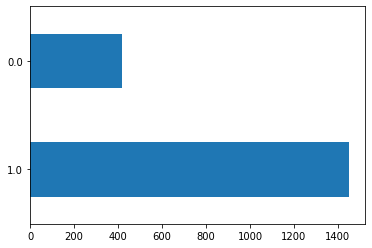

In [ ]:
#plotting class frequency after down samplling
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

In [ ]:
import glob
import nltk
import string
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocessing(doc):
  puncd = {  }
  for i in string.punctuation:
    puncd[i] = ' '
  doc = doc.translate(str.maketrans(puncd))                     #replacing the punctuation marks with white spaces. 
  doc = doc.strip()                                             #removing the extra white space characters. 
  doc = doc.lower()                                             #making the string to lower case letters. 

  tokens = word_tokenize(doc)                                         #tokenise the words to a list. 
  tokens_NoStop = [i for i in tokens if i not in stop_words]                #removing the stop words from the tokenised list. 
  lemmatizer=WordNetLemmatizer()
  lemmedWordtext = []
  for i in range(len(tokens_NoStop)):
    lemmedWordtext.append(lemmatizer.lemmatize(tokens_NoStop[i]))           #appending the lemmatized word in the list
  return lemmedWordtext
Xnew = []
for i in range(len(X)):
  Xnew.append(preprocessing(X[i]))

print(Xnew[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[['rt', 'vijaytrendspage', 'smashed', '50k', 'tweet', 'along', 'trending', 'india', 'trend', '🔥', 'vaathicoming100mviews', 'master', 'actorvijay'], ['rt', 'btp', 'offl', '50k', 'tweet', 'done', 'amp', 'dusted', '💥💥', 'vaathicoming100mviews', 'master', 'actorvijay'], ['rt', 'deviofficial7', 'get', '111', 'comment', '🥺\U0001f90d', 'tag', 'vaathicoming100mviews', 'master', 'actorvijay'], ['rt', 'troll', 'cinema', 'vaathicoming', 'crowned', 'best', 'tamil', 'track', '2020', 'spotify', 'saavan', 'amazon', 'music', '2020💥💥', 'vaathicoming100mvi…'], ['robiless', 'screen', 'magnifier', 'mobile', 'phone', 'screen', 'expender', 'eye', 'protection', 'amazon'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=37)
print(X_train.shape)
print(X_test.shape)

(1250,)
(617,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = preprocessing)#,stop_words=stop_words
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(class_prior = [0.999, 0.001])
y_train = y_train.astype('i')
print(y_train.dtype)
model.fit(X_trainT, y_train)

#saving model then reading it again
pickle.dump(model, open('baseLineModel.sav', 'wb'))
model = pickle.load(open('baseLineModel.sav', 'rb'))

y_pred = model.predict(X_testT)
print("shape of y pred",y_pred.shape)
print("shape of y test",y_test.shape)
print(y_pred[:100])
print(y_test[:100])
y_test = y_test.astype('i')
print("Accuracy: ",accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))
# X_trainT

No of features after vectorizing X_train: 4116
shape of X_trainT: (1250, 4116)
int32
shape of y pred (617,)
shape of y test (617,)
[1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0]
[1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0]
Accuracy:  0.8038897893030794
[[124  14]
 [107 372]]
              precision    recall  f1-score   support

           0       0.54      0.90      0.67       138
           1       0.96      0.78      0.86       479

    accuracy                           0.80       617
   macro avg       0.75      0.84      0.77       617
weighted avg       0.87      0.80      0.82       617



In [ ]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0).fit(X, y)
# clf.predict(X[:2, :])

Sentiment Analysis

In [ ]:
from textblob import TextBlob
sentiment = np.zeros(len(X))
for i in range(len(X)):
  analysis = TextBlob(X[i])
  if analysis.sentiment.polarity > 0:
      sentiment[i] = 1
  elif analysis.sentiment.polarity < 0:
      sentiment[i] = -1
hijPos = 0; hijNeg = 0; hijNeu = 0
unHijPos = 0; unHijNeg = 0; unHiNeu = 0
hijacked = 0; unhijacked = 0
for i in range(len(X)):
  if(y[i] == 0):
    hijacked += 1
    if(sentiment[i] == -1):
      hijNeg += 1
    elif(sentiment[i] == 1):
      hijPos += 1
    else:
      hijNeu += 1
  elif(y[i] == 1):
    unhijacked += 1
    if(sentiment[i] == -1):
      unHijNeg += 1
    elif(sentiment[i] == 1):
      unHijPos += 1  
    else:
      unHiNeu += 1  

n = len(X)

print("Positive sentiment in Hijacked tweets", hijPos*100/hijacked, '%')
print("Negative sentiment in Hijacked tweets", hijNeg*100/hijacked, '%')
print("Neutral sentiment in Hijacked tweets", hijNeu*100/hijacked, '%')

print("Positive sentiment in UnHijacked tweets", unHijPos*100/unhijacked, '%')
print("Negative sentiment in UnHijacked tweets", unHijNeg*100/unhijacked, '%')
print("Neutral sentiment in Hijacked tweets", unHiNeu*100/unhijacked, '%')


Positive sentiment in Hijacked tweets 26.139088729016787 %
Negative sentiment in Hijacked tweets 5.5155875299760195 %
Neutral sentiment in Hijacked tweets 68.34532374100719 %
Positive sentiment in UnHijacked tweets 45.44827586206897 %
Negative sentiment in UnHijacked tweets 13.517241379310345 %
Neutral sentiment in Hijacked tweets 41.03448275862069 %
